In [44]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
from imblearn.under_sampling import RandomUnderSampler

In [52]:
train = pd.read_csv('training_data')

In [53]:
X_train = train.drop('output', axis = 1)

In [54]:
len(X_train.columns)

26

In [55]:
y_train = train['output']

In [60]:
test = pd.read_csv('testing_data')

In [61]:
X_test = test.drop('output', axis = 1)

In [64]:
y_test = test['output']

# Model Using Partial Data

In [67]:
from collections import Counter
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_train, y_under_train = undersample.fit_resample(X_train, y_train)
print("Undersampled class distribution:", Counter(y_under_train))

Undersampled class distribution: Counter({0: 7506, 1: 7506})


In [69]:
model = Sequential()

In [71]:
model.add(Dense(26, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [73]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [75]:
model.fit(x = X_under_train, y = y_under_train, validation_data= (X_test, y_test), epochs = 500, verbose = 1, batch_size = 4000)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9362.8525 - val_loss: 17200.0098
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8182.5142 - val_loss: 14824.4111
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7085.9995 - val_loss: 12503.8398
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5965.5293 - val_loss: 10252.6895
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4809.8174 - val_loss: 8073.1172
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3707.2798 - val_loss: 6321.4062
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3050.1096 - val_loss: 4786.2925
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2180.0610 - val_loss: 3523.2095
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1574.9531 - val_loss: 2291.1233
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1012.1505 - val_loss: 1642.4404
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 766.9150 - val_loss: 1280.2360
Epoch

In [77]:
losses = pd.DataFrame(model.history.history)

<Axes: >

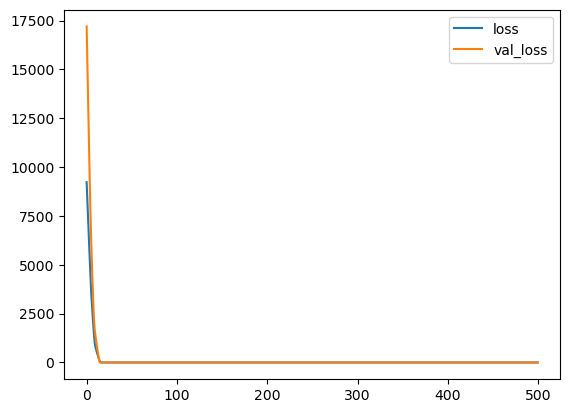

In [79]:
losses.plot()

# Model Using Complete Data

In [81]:
model_complete = Sequential()
model_complete.add(Dense(26, activation = 'relu'))
model_complete.add(Dense(14, activation = 'relu'))
model_complete.add(Dense(1, activation = 'sigmoid'))
model_complete.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
model_complete.fit(x = X_train, y = y_train, validation_data= (X_test, y_test), epochs = 500, verbose = 1, batch_size = 4000)

Epoch 1/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 205.8320 - val_loss: 0.9169
Epoch 2/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 25.7212 - val_loss: 2.8747
Epoch 3/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 20.7508 - val_loss: 3.4751
Epoch 4/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 18.2871 - val_loss: 1.0369
Epoch 5/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 20.2129 - val_loss: 14.1774
Epoch 6/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 21.4112 - val_loss: 19.7449
Epoch 7/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 25.1089 - val_loss: 9.9505
Epoch 8/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 21.6869 - val_loss: 7.8260
Epoch 9/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 23.9947 - val_loss: 5.4889
Epoch 10/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 18.1428 - val_loss: 6.1204
Epoch 11/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 20.1898 - val_loss: 3.2297
Epoch 1

KeyboardInterrupt: 

### As we can see that while using complete un-undersampled data, the validation data and the loss are both very low, but that is owning to the fact that the majority of data points in both data sets are those corresponding to "NON-FRAUD". Hence, to truly test the validity of these models we need to test them on data sets where both "Fraud" and "Non-Fraud" data points are in comparable ratio

In [87]:
X_under_test, y_under_test = undersample.fit_resample(X_test, y_test)
print("Undersampled class distribution:", Counter(y_under_test))

Undersampled class distribution: Counter({0: 2145, 1: 2145})


In [89]:
prediction_model = model.predict(X_under_test)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step


In [91]:
prediction_model_complete = model_complete.predict(X_under_test)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step


In [93]:
from sklearn.metrics import classification_report, confusion_matrix

#### Metrics of model 1

In [98]:
prediction_model

array([[0.38645667],
       [0.38645667],
       [0.38645667],
       ...,
       [0.38645667],
       [0.38645676],
       [0.38645676]], dtype=float32)

In [102]:
predictions_model1 = []
for i in range(len(prediction_model)):
    if prediction_model[i][0] > 0.5:
        prediction_model[i][0] = int(1)
        predictions_model1.append(prediction_model[i][0]) 
    else:
        prediction_model[i][0] = int(0)
        predictions_model1.append(prediction_model[i][0])

In [104]:
print(classification_report(y_under_test, predictions_model1))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75      2145
           1       0.96      0.37      0.54      2145

    accuracy                           0.68      4290
   macro avg       0.78      0.68      0.65      4290
weighted avg       0.78      0.68      0.65      4290



In [107]:
print(confusion_matrix(y_under_test, predictions_model1))

[[2108   37]
 [1344  801]]


#### Metrics of Model 2

In [110]:
predictions_model2 = []
for i in range(len(prediction_model_complete)):
    if prediction_model_complete[i][0] > 0.5:
        prediction_model_complete[i][0] = int(1)
        predictions_model2.append(prediction_model_complete[i][0]) 
    else:
        prediction_model_complete[i][0] = int(0)
        predictions_model2.append(prediction_model_complete[i][0])

In [112]:
print(classification_report(y_under_test, predictions_model2))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80      2145
           1       1.00      0.49      0.65      2145

    accuracy                           0.74      4290
   macro avg       0.83      0.74      0.72      4290
weighted avg       0.83      0.74      0.72      4290



In [114]:
print(confusion_matrix(y_under_test, predictions_model2))

[[2144    1]
 [1102 1043]]
